## Movie Lens 1M data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
user_names = ['user_id', 'gender','age','occupation','zip']
users = pd.read_table('users.dat', sep='::', header=None, names=user_names, engine='python')

In [9]:
ratings_names = ['user_id','movie_id','ratings','timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names= ratings_names, engine='python')

In [12]:
mnames=['movie_id','title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [14]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
ratings.head(5)

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
#merge the dataframes
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,ratings,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   ratings     1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip         1000209 non-null  object
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


### Average rating of each movie grouped by gender

In [22]:
#use pivot table to achieve task
avg_film_rating = data.pivot_table('ratings', index='title', columns='gender', aggfunc='mean')
avg_film_rating.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [31]:
indexer = avg_film_rating.sum(1).argsort()

In [32]:
indexer[:10]

title
$1,000,000 Duck (1971)               1063
'Night Mother (1986)                  932
'Til There Was You (1997)            1033
'burbs, The (1989)                   2412
...And Justice for All (1979)        1546
1-900 (1994)                         1995
10 Things I Hate About You (1999)    2021
101 Dalmatians (1961)                1313
101 Dalmatians (1996)                 439
12 Angry Men (1957)                  2019
dtype: int64

### Top 10 highest rated films

In [47]:
avg_film_rating.sum(1).nlargest(10)

title
Gate of Heavenly Peace, The (1995)                                     10.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                     9.750000
Lamerica (1994)                                                         9.666667
Apple, The (Sib) (1998)                                                 9.350000
Close Shave, A (1995)                                                   9.118239
Shawshank Redemption, The (1994)                                        9.099700
Wrong Trousers, The (1993)                                              9.066496
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)     9.057760
Schindler's List (1993)                                                 9.054017
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                           9.037239
dtype: float64

In [48]:
count_subset = avg_film_rating.take(indexer[-10:])

In [49]:
count_subset = count_subset.stack()

In [50]:
count_subset.name = 'total_rating'

In [51]:
count_subset = count_subset.reset_index()

In [52]:
count_subset[:10]

,title,gender,total_rating
0,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),F,4.572650
1,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),M,4.464589
2,Schindler's List (1993),F,4.562602
3,Schindler's List (1993),M,4.491415
4,Seven Samurai (The Magnificent Seven) (Shichin...,F,4.481132
5,Seven Samurai (The Magnificent Seven) (Shichin...,M,4.576628
6,"Wrong Trousers, The (1993)",F,4.588235
7,"Wrong Trousers, The (1993)",M,4.478261
8,"Shawshank Redemption, The (1994)",F,4.539075
9,"Shawshank Redemption, The (1994)",M,4.560625


<Axes: xlabel='total_rating', ylabel='title'>

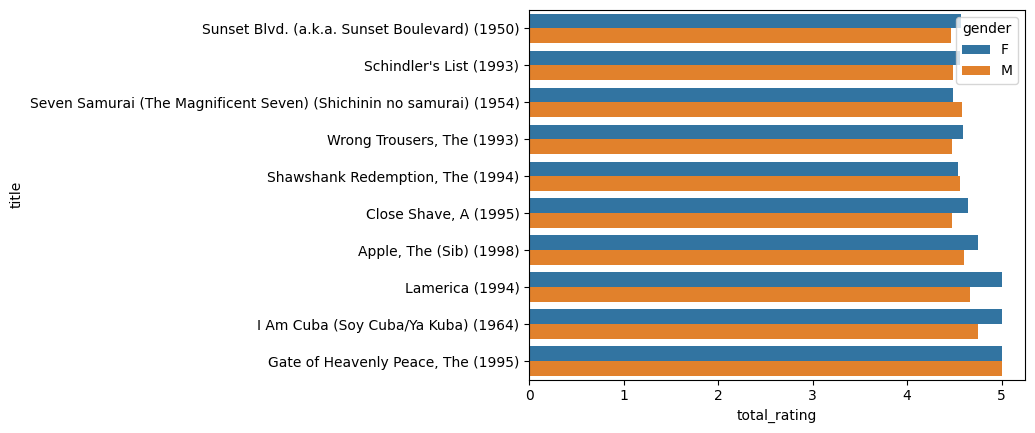

In [53]:
sns.barplot(x='total_rating', y='title', hue='gender', data=count_subset)

### Top 10 lowest rated films

In [59]:
low_count_subset = avg_film_rating.take(indexer[0: 10])

In [60]:
low_count_subset = low_count_subset.stack()

In [61]:
low_count_subset.name = 'total_rating'

In [62]:
low_count_subset = low_count_subset.reset_index()

In [63]:
low_count_subset[:10]

,title,gender,total_rating
0,Even Dwarfs Started Small (Auch Zwerge haben k...,M,1.0
1,Diebinnen (1995),M,1.0
2,Elstree Calling (1930),M,1.0
3,Nueba Yol (1995),M,1.0
4,Hillbillys in a Haunted House (1967),M,1.0
5,Lotto Land (1995),M,1.0
6,"Low Life, The (1994)",M,1.0
7,Get Over It (1996),M,1.0
8,"Blood Spattered Bride, The (La Novia Ensangren...",M,1.0
9,"Loves of Carmen, The (1948)",F,1.0


<Axes: xlabel='total_rating', ylabel='title'>

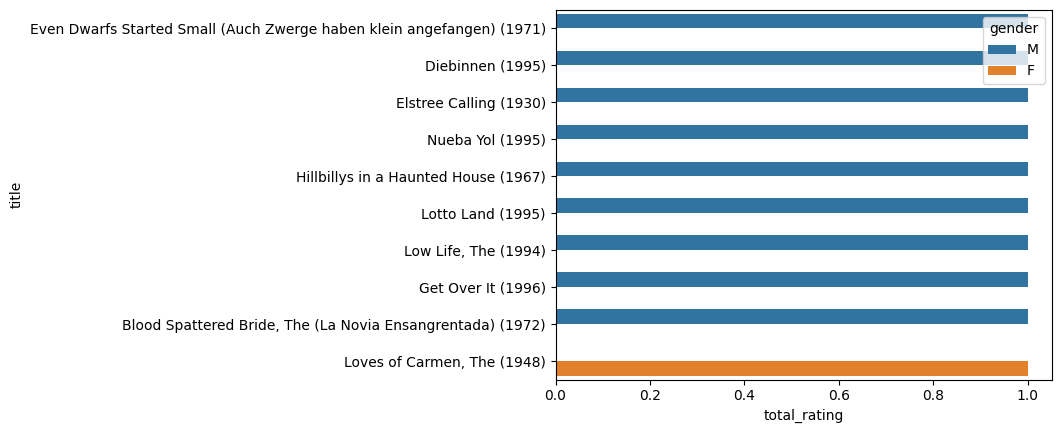

In [65]:
sns.barplot(x='total_rating', y='title', hue='gender', data=low_count_subset)